Mean Squared Error (MSE): 114.00401415258509
R-squared (R2): 0.14859840584590878


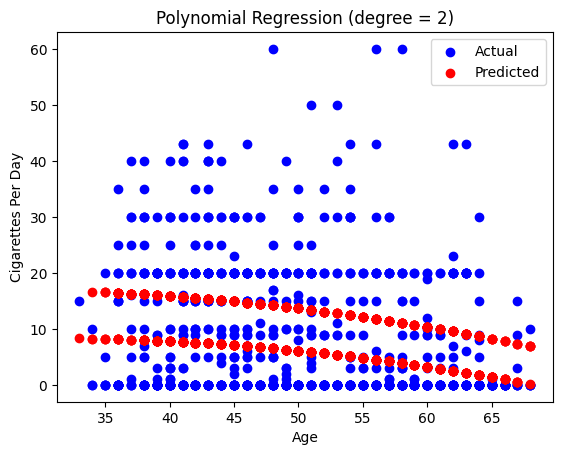

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (Framingham dataset)
df = pd.read_csv('framingham.csv')

# For this example, let's predict cigsPerDay (number of cigarettes per day) based on age and male.
# You can replace this with other features and target based on your need.

# Select the features and the target variable
X = df[['age', 'male']]  # Independent variables
y = df['cigsPerDay']      # Dependent variable (Target)

# Drop rows with missing values in either X or y
df = df.dropna(subset=['age', 'male', 'cigsPerDay']) # Drop rows with missing values from the DataFrame

# Select the features and the target variable after dropping missing values
X = df[['age', 'male']]  # Independent variables
y = df['cigsPerDay']      # Dependent variable (Target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial transformation to the features
degree = 2  # Degree of the polynomial regression
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualizing the result (only works with one feature, so let's just use 'age' for this)
plt.scatter(X_test['age'], y_test, color='blue', label='Actual')
plt.scatter(X_test['age'], y_pred, color='red', label='Predicted')
plt.title('Polynomial Regression (degree = {})'.format(degree))
plt.xlabel('Age')
plt.ylabel('Cigarettes Per Day')
plt.legend()
plt.show()